In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import multiprocessing as mp
import matplotlib.pyplot as plt
import matplotlib as matplot

from scipy import stats
from scipy.stats import norm, skew #for some statistics

from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff # create_table for categorical variables
import cufflinks
cufflinks.go_offline()  
cufflinks.set_config_file(world_readable=True, theme='pearl')

import plotly.graph_objs as go # graphs on objects
import chart_studio.plotly as py # plotly library


## Data Exploratory and Understanding

In [3]:
df = pd.read_csv('flat_sb_2020.csv')

C:\Users\Kal-El\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (0,3,4,7,9,11,13,14,15,16,17,18,19,20,21,22,23,27,28,29,33,34,41,42,43,44,45,46,49,50,51,52,53,54,58,62,63,67,68,69,70,71,77,78,83,84,85,86,87,88,89,98,99,100,101,104,105,107,117,126,127,129,138,139,143,155,156,157,158,159,166,167,168,171,172,173,174,175,176,179,182,183,184,185,186,187,188,189,190,191,192,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,219,220,221,222,223,224,225,226,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,247,248,249,250,251,252,255,258,259,260,261,262,263,264,265,266,267,268,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,340,341,342,343,344,345,348,349,350,351,352,353,354,355,356,357,358

In [4]:
df.describe()

,in_reply_to_status_id,in_reply_to_user_id,user.statuses_count,retweeted_status.user.statuses_count,retweeted_status.user.following,retweeted_status.user.follow_request_sent,retweeted_status.coordinates,retweeted_status.contributors,retweeted_status.quote_count,retweeted_status.reply_count,...,retweeted_status.quoted_status.in_reply_to_user_id_str,retweeted_status.quoted_status.user.id,retweeted_status.quoted_status.user.id_str,retweeted_status.quoted_status.user.favourites_count,retweeted_status.quoted_status.user.statuses_count,retweeted_status.quoted_status.quote_count,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str
count,5.820700e+04,8.149000e+04,4.940550e+05,2.864190e+05,0.0,0.0,1.000000e+00,1.000000e+00,286401.000000,2.864020e+05,...,8.450000e+02,2.371300e+04,2.371300e+04,23713.000000,2.371300e+04,23713.000000,7.670000e+02,7.670000e+02,1.863000e+03,1.863000e+03
mean,1.223267e+18,2.178338e+17,3.602227e+04,9.669586e+04,NaN,NaN,1.224144e+18,1.224144e+18,482.516388,1.423427e+04,...,1.393274e+17,1.337315e+17,1.337315e+17,13988.482647,5.454082e+04,1010.538101,1.211414e+18,1.211414e+18,1.215874e+18,1.215874e+18
std,2.732895e+16,4.122221e+17,7.133743e+05,1.695312e+05,NaN,NaN,NaN,NaN,1088.328778,7.060301e+06,...,3.453068e+17,3.473980e+17,3.473980e+17,32650.691582,1.050205e+05,2390.320965,9.586781e+16,9.586781e+16,7.856791e+16,7.856791e+16
min,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,NaN,NaN,1.224144e+18,1.224144e+18,0.000000,0.000000e+00,...,1.304936e+07,6.908230e+05,6.908230e+05,0.000000,1.000000e+00,0.000000,2.409060e+17,2.409060e+17,8.783073e+09,8.783073e+09
25%,1.224123e+18,5.701693e+07,1.925000e+03,6.125000e+03,NaN,NaN,1.224144e+18,1.224144e+18,4.000000,7.000000e+00,...,3.607687e+07,8.416315e+07,8.416315e+07,3723.000000,1.436500e+04,37.000000,1.223816e+18,1.223816e+18,1.223962e+18,1.223962e+18
50%,1.224134e+18,4.712388e+08,8.812000e+03,1.934100e+04,NaN,NaN,1.224144e+18,1.224144e+18,56.000000,5.500000e+01,...,3.349886e+08,7.420112e+08,7.420112e+08,3723.000000,5.310200e+04,620.000000,1.224046e+18,1.224046e+18,1.224115e+18,1.224115e+18
75%,1.224149e+18,3.901788e+09,2.976500e+04,6.607300e+04,NaN,NaN,1.224144e+18,1.224144e+18,582.000000,2.640000e+02,...,2.520581e+09,7.420112e+08,7.420112e+08,13833.000000,5.310200e+04,620.000000,1.224115e+18,1.224115e+18,1.224146e+18,1.224146e+18
max,1.224173e+18,1.224170e+18,4.974520e+08,2.545417e+06,NaN,NaN,1.224144e+18,1.224144e+18,81094.000000,3.778429e+09,...,1.212439e+18,1.224088e+18,1.224088e+18,648112.000000,1.596516e+06,109403.000000,1.224168e+18,1.224168e+18,1.224171e+18,1.224171e+18


In [5]:
df.head()

,Unnamed: 0,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted_status.extended_tweet.entities.polls,retweeted_status.scopes.followers,quoted_status.entities.polls,retweeted_status.quoted_status.extended_tweet.entities.polls,retweeted_status.quoted_status.entities.polls,quoted_status.extended_tweet.entities.polls,retweeted_status.quoted_status.user.withheld_in_countries,retweeted_status.quoted_status.withheld_in_countries,quoted_status.user.withheld_in_countries,quoted_status.withheld_in_countries
0,2,5e37c79ad45e79dd671e47ed,Mon Feb 03 03:28:35 +0000 2020,1224172804100194304,1224172804100194304,RT @theBaeSensei: I’ll drink bleach before i p...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,5e37c79ad45e79dd671e47ec,Mon Feb 03 03:28:44 +0000 2020,1224172844097179654,1224172844097179654,RT @theBaeSensei: I’ll drink bleach before i p...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,5e37c79ad45e79dd671e47e8,Mon Feb 03 03:29:44 +0000 2020,1224173095369486338,1224173095369486338,"RT @BleachImmortal: ""My name is Ichigo Kurosak...","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,5e37c79ad45e79dd671e47e6,Mon Feb 03 03:29:54 +0000 2020,1224173137698467842,1224173137698467842,"RT @ZBrag101: My Next Video, hav't started yet...","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,5e37c79ad45e79dd671e47f0,Mon Feb 03 03:28:29 +0000 2020,1224172779559321600,1224172779559321600,@AubreyNexus @LaudenRolly When I bleach my hai...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.columns.values)

['Unnamed: 0' '_id' 'created_at' 'id' 'id_str' 'text' 'source' 'truncated'
 'in_reply_to_status_id' 'in_reply_to_status_id_str' 'in_reply_to_user_id'
 'in_reply_to_user_id_str' 'in_reply_to_screen_name' 'geo' 'coordinates'
 'place' 'contributors' 'is_quote_status' 'quote_count' 'reply_count'
 'retweet_count' 'favorite_count' 'favorited' 'retweeted' 'filter_level'
 'lang' 'matching_rules' 'timestamp' 'valid_time' 'period' 'AdTitle'
 'Brand' 'sentiment' 'user.id' 'user.id_str' 'user.name'
 'user.screen_name' 'user.location' 'user.url' 'user.description'
 'user.translator_type' 'user.protected' 'user.verified'
 'user.followers_count' 'user.friends_count' 'user.listed_count'
 'user.favourites_count' 'user.statuses_count' 'user.created_at'
 'user.utc_offset' 'user.time_zone' 'user.geo_enabled' 'user.lang'
 'user.contributors_enabled' 'user.is_translator'
 'user.profile_background_color' 'user.profile_background_image_url'
 'user.profile_background_image_url_https' 'user.profile_background_t

In [23]:
Tweet = df[['timestamp','text','valid_time','Brand','sentiment','period','AdTitle','user.description','user.followers_count','user.location','retweet_count']]

In [24]:
Tweet

,timestamp,text,valid_time,Brand,sentiment,period,AdTitle,user.description,user.followers_count,user.location,retweet_count
0,1.5807e+09,RT @theBaeSensei: I’ll drink bleach before i p...,True,NFL,negative,4,Next 100,3 cans short of a 6 pack ... #TeamOnBullshit,244,NaN,0
1,1.5807e+09,RT @theBaeSensei: I’ll drink bleach before i p...,True,NFL,negative,4,Next 100,boy momma. 28. 🤞🏽🐻💙 insta @chanelisamazing,1236,NaN,0
2,1.5807e+09,"RT @BleachImmortal: ""My name is Ichigo Kurosak...",True,NFL,positive,4,Next 100,Hey everyone! I'm RallyHitzZ | 17 | #Anime | E...,159,Soul Society,0
3,1.5807e+09,"RT @ZBrag101: My Next Video, hav't started yet...",True,NFL,negative,4,Next 100,My advice to the world: Normalcy is overrated....,561,"Fort Wayne, IN",0
4,1.5807e+09,@AubreyNexus @LaudenRolly When I bleach my hai...,True,NFL,neutral,4,Next 100,20 | TN | Cosplayer | Hero Enthusiast\n\nNext ...,11,"Murfreesboro, TN",1
...,...,...,...,...,...,...,...,...,...,...,...
496340,1.58069e+09,"RT @Automotive_News: From Hummer to Hyundai, p...",True,hyundai,positive,1,Smaht Pahk,"Senior Editor at SME's media group, covering m...",1028,NaN,0
496341,1.58069e+09,“Hummer 2.0” https://t.co/dxkHgDDu5U,True,None,neutral,1,None,39yo Software Engineer in Indianapolis. Cyclis...,90,"Indianapolis, Indiana",0
496342,1.58069e+09,@PrezesKochany Hummer? :),True,None,neutral,1,None,"W mej ekipie Mrówkolew, Świetlik, Ambaras i Ar...",205,Polska,0
496343,1.58069e+09,RT @blovereviews: Possible leaked image of the...,True,General Motors,negative,1,Quiet Revolution,"Ev owner + advocate in Sydney, 100% Solar powe...",1063,"Sydney, New South Wales",0


In [19]:
Mood_count=Tweet['sentiment'].value_counts()
Mood_count

positive                                            252132
neutral                                             187552
negative                                             56610
http://abs.twimg.com/images/themes/theme1/bg.png         2
Lake Rotoma, Rotorua District                            1
Florida                                                  1
Canada                                                   1
Name: sentiment, dtype: int64

## Sentiment 

([<matplotlib.axis.XTick at 0x234ef61b688>,
 <a list of 3 Text xticklabel objects>)

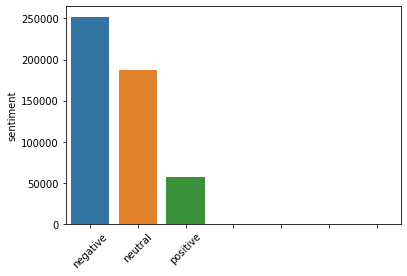

In [43]:
Index = [0,1,2,3,4,5,6]
sns.barplot(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)


## Brand Count

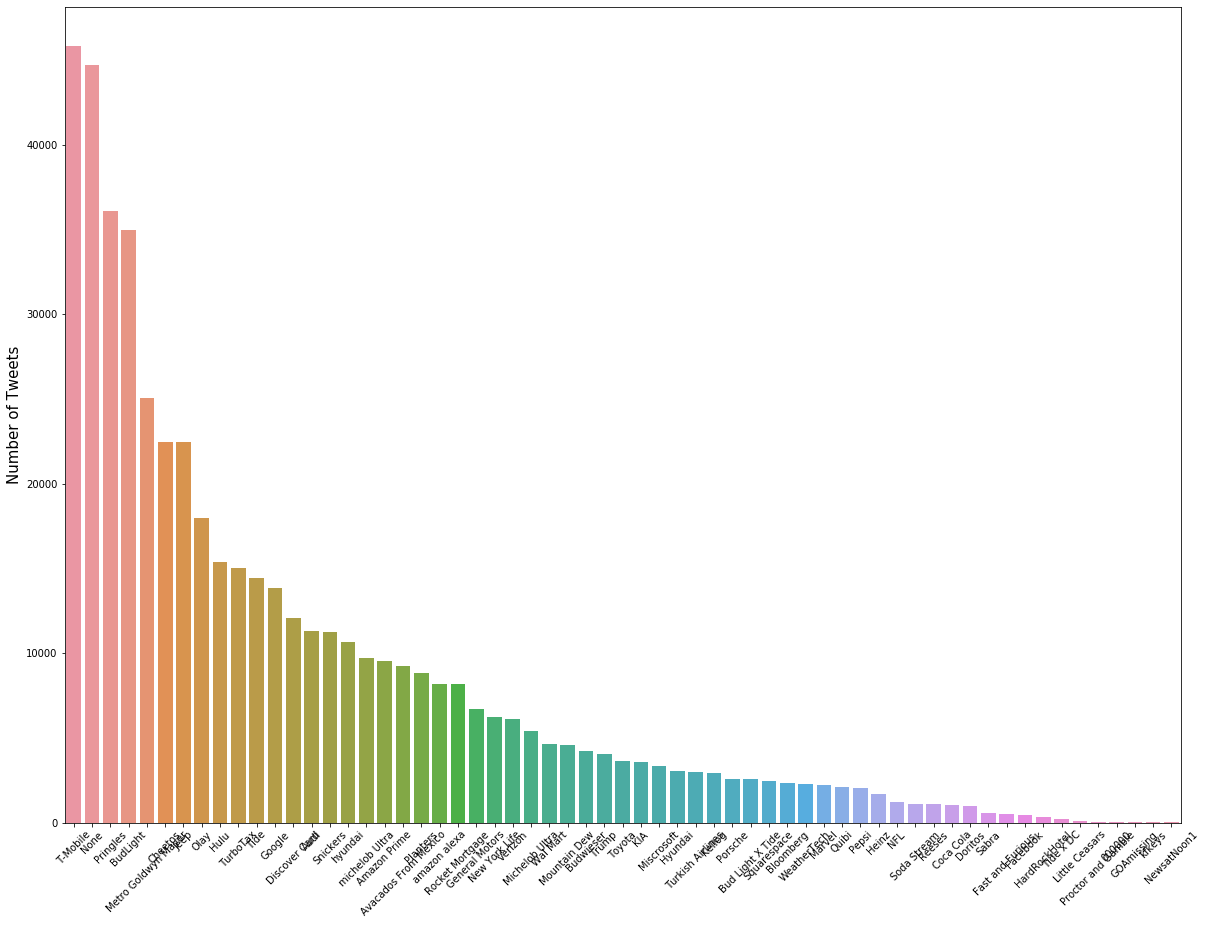

In [92]:
Brand_count=Tweet['Brand'].value_counts()
fig, ax = plt.subplots(figsize=(20,15))
bar = sns.barplot(Brand_count.index,Brand_count.values)

plt.xticks(rotation=45)
plt.ylabel('Number of Tweets',fontsize=15)
plt.show()

In [105]:
Brand_count=Tweet['Brand'].value_counts()


## word cloud

In [108]:
# pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
negat_tw=Tweet[Tweet['sentiment']=='negative']
words = ' '.join(negat_tw['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [109]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

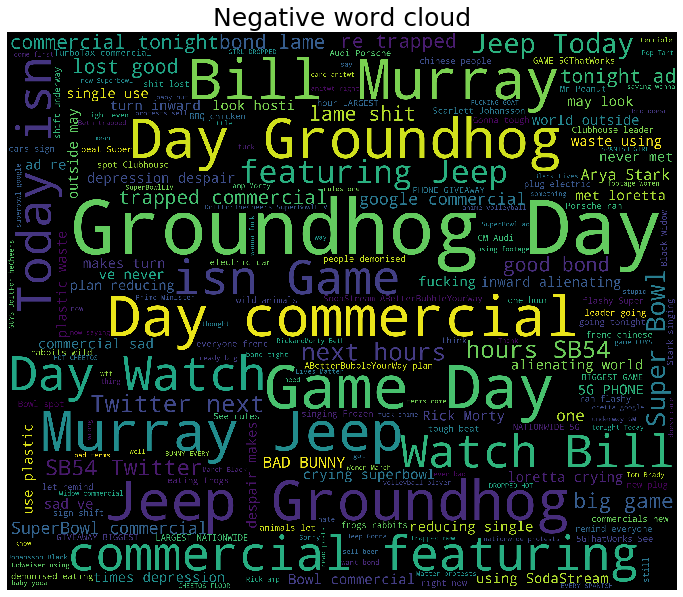

In [113]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Negative word cloud',fontsize=25)
plt.show()

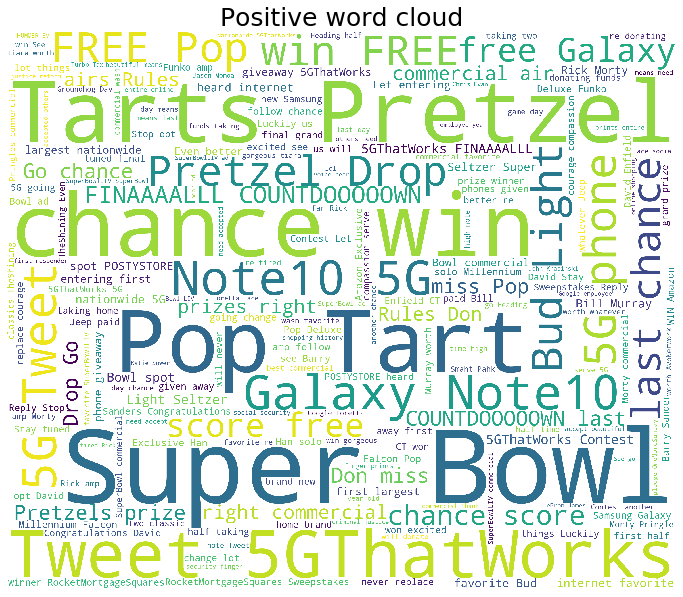

In [114]:

pos_tw=Tweet[Tweet['sentiment']=='positive']
pos_words = ' '.join(pos_tw['text'])
cleaned_word = " ".join([word for word in pos_words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud_positive = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_positive)
plt.title('Positive word cloud',fontsize=25)
plt.axis('off')
plt.show()